In [1]:
import pandas, numpy, seaborn, scipy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [3]:
input_file = 'supplemetary_information_table_SIT1.expression.xlsx'

In [4]:
biomarkers = {
    'ENSG00000078401':['EDN1', 'endothelin 1'], # endothelin 1
    'ENSG00000127129':['EDN2', 'endothelin 2'], # endothelin 2
    'ENSG00000124205':['EDN3', 'endothelin 3'], # endothelin 3
    'ENSG00000106366':['SERPINE1', 'serpin family E member 1'], # PAI-1, encoded by SERPINE-1
    'ENSG00000122861':['PLAU', 'plasminogen activator, urokinase'], # uPA
    'ENSG00000162692':['VCAM1', 'vascular cell adhesion molecule 1'],# VCAM-1
    'ENSG00000188404':['SELL', 'selectin L'], # Lselectin
    'ENSG00000091879':['ANGPT2', 'angiopoietin 2'],# Ang2
    'ENSG00000102755':['FLT1', 'fms related receptor tyrosine kinase 1'],# VEGFr1
    'ENSG00000108622':['ICAM2', 'intercellular adhesion molecule 2'],# ICAM-2
    'ENSG00000120156':['TEK', 'TEK receptor tyrosine kinase'],# tie2
    'ENSG00000136244':['IL6', 'interleukin 6'],# IL-6
    'ENSG00000007908':['SELE', 'selectin E'],# E-selectin
    'ENSG00000090339':['ICAM1', 'intercellular adhesion molecule 1'],# ICAM-1
    'ENSG00000110799':['VWF', 'von Willebrand factor'],# vWF
    'ENSG00000197461':['PDGFA', 'platelet derived growth factor subunit A'],# PDGF
    'ENSG00000100311':['PDGFB', 'platelet derived growth factor subunit B'],
    'ENSG00000145431':[' PDGFC', 'platelet derived growth factor C'],
    'ENSG00000170962':[' PDGFD', 'platelet derived growth factor D'],
    'ENSG00000134853':[' PDGFRA', 'platelet derived growth factor receptor alpha'],
    'ENSG00000113721':[' PDGFRB', 'platelet derived growth factor receptor beta'],  
    'ENSG00000164283':['ESM1', 'endothelial cell specific molecule 1'],# endocan
    'ENSG00000228978':['TNF', 'tumor necrosis factor'],
    'ENSG00000204490':['TNF', 'tumor necrosis factor'],
    'ENSG00000228849':['TNF', 'tumor necrosis factor'],
    'ENSG00000230108':['TNF', 'tumor necrosis factor'],
    'ENSG00000223952':['TNF', 'tumor necrosis factor'],
    'ENSG00000228321':['TNF', 'tumor necrosis factor'],
    'ENSG00000206439':['TNF', 'tumor necrosis factor'],
    'ENSG00000232810':['TNF', 'tumor necrosis factor'],
    'ENSG00000112715':['VEGFA', 'vascular endothelial growth factor A'],
    'ENSG00000173511':['VEGFB', 'vascular endothelial growth factor B'],
    'ENSG00000150630':['VEGFC', 'vascular endothelial growth factor C'],
    'ENSG00000165197':['VEGFD', 'vascular endothelial growth factor D'],
    'ENSG00000119630':['PGF', 'placental growth factor']
  
}
print(len(biomarkers.keys()))
biomarkers

35


{'ENSG00000078401': ['EDN1', 'endothelin 1'],
 'ENSG00000127129': ['EDN2', 'endothelin 2'],
 'ENSG00000124205': ['EDN3', 'endothelin 3'],
 'ENSG00000106366': ['SERPINE1', 'serpin family E member 1'],
 'ENSG00000122861': ['PLAU', 'plasminogen activator, urokinase'],
 'ENSG00000162692': ['VCAM1', 'vascular cell adhesion molecule 1'],
 'ENSG00000188404': ['SELL', 'selectin L'],
 'ENSG00000091879': ['ANGPT2', 'angiopoietin 2'],
 'ENSG00000102755': ['FLT1', 'fms related receptor tyrosine kinase 1'],
 'ENSG00000108622': ['ICAM2', 'intercellular adhesion molecule 2'],
 'ENSG00000120156': ['TEK', 'TEK receptor tyrosine kinase'],
 'ENSG00000136244': ['IL6', 'interleukin 6'],
 'ENSG00000007908': ['SELE', 'selectin E'],
 'ENSG00000090339': ['ICAM1', 'intercellular adhesion molecule 1'],
 'ENSG00000110799': ['VWF', 'von Willebrand factor'],
 'ENSG00000197461': ['PDGFA', 'platelet derived growth factor subunit A'],
 'ENSG00000100311': ['PDGFB', 'platelet derived growth factor subunit B'],
 'ENSG000

In [5]:
%%time
# it takes 13 seconds
df = pandas.read_excel(input_file, index_col=0, skiprows=3)
df

CPU times: user 11.9 s, sys: 98.6 ms, total: 12 s
Wall time: 12.3 s


,Gene name,Gene biotype,RSS_HLMV_28,RSS_HLMV_29,RSS_HLMV_30,RSS_HLMV_31,RSS_HLMV_32,RSS_HLMV_33,RSS_HLMV_34,RSS_HLMV_36,...,RSS_HLMV_45,RSS_HLMV_46,RSS_HLMV_47,RSS_HLMV_48,RSS_HLMV_49,RSS_HLMV_50,RSS_HLMV_51,RSS_HLMV_52,RSS_HLMV_53,RSS_HLMV_54
ENSEMBL ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,TSPAN6,protein_coding,38.526890,35.309339,39.840736,41.951376,38.061629,38.565773,38.346359,43.985521,...,35.204046,36.511499,29.939159,31.072017,40.662226,36.395800,24.905552,35.040346,30.920235,37.974110
ENSG00000000005,TNMD,protein_coding,0.000000,0.000000,0.000000,0.278312,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.177716,0.059379,0.000000,0.000000,0.000000,0.116122,0.015197,0.000000
ENSG00000000419,DPM1,protein_coding,69.415227,49.131680,66.184838,92.956950,88.650591,85.447069,127.356106,157.183636,...,113.265541,106.959497,99.429725,85.549739,102.582479,100.516519,84.135830,95.060423,96.772840,107.100754
ENSG00000000457,SCYL3,protein_coding,3.331287,2.858376,3.504064,5.829721,5.274378,4.404222,3.822031,5.466647,...,3.444193,3.965564,3.876106,3.360422,4.843100,4.291843,2.957526,4.852541,3.489343,3.486497
ENSG00000000460,C1orf112,protein_coding,2.744336,3.172060,3.679316,4.587781,3.403177,3.809046,3.916106,4.543919,...,3.024118,3.693697,2.545423,2.743481,3.342448,3.326444,3.072015,3.377629,2.217106,3.247478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000283696,RP11-122G18.12,lincRNA,0.483652,0.767771,0.412048,0.581424,0.552950,0.825292,0.777304,0.816808,...,0.604989,0.881323,0.406116,0.663144,0.569725,0.791771,0.710157,1.016730,0.326707,0.540686
ENSG00000283697,RP5-937E21.8,protein_coding,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084575,...,0.007867,0.000000,0.101720,0.000000,0.000000,0.000000,0.000000,0.042025,0.034125,0.000000
ENSG00000283698,RP11-606M12.1,transcribed_unitary_pseudogene,0.789010,0.336980,0.079578,0.971747,0.601687,0.546538,0.206818,0.669518,...,0.840765,0.872333,0.707989,0.465739,1.562857,0.868296,2.140743,0.720321,0.904293,0.429124


In [6]:
biomarkers_ensembls = list(biomarkers.keys())
biomarkers_ensembls.sort()
print(biomarkers_ensembls)
subset = df.loc[biomarkers_ensembls, :]
subset.shape

['ENSG00000007908', 'ENSG00000078401', 'ENSG00000090339', 'ENSG00000091879', 'ENSG00000100311', 'ENSG00000102755', 'ENSG00000106366', 'ENSG00000108622', 'ENSG00000110799', 'ENSG00000112715', 'ENSG00000113721', 'ENSG00000119630', 'ENSG00000120156', 'ENSG00000122861', 'ENSG00000124205', 'ENSG00000127129', 'ENSG00000134853', 'ENSG00000136244', 'ENSG00000145431', 'ENSG00000150630', 'ENSG00000162692', 'ENSG00000164283', 'ENSG00000165197', 'ENSG00000170962', 'ENSG00000173511', 'ENSG00000188404', 'ENSG00000197461', 'ENSG00000204490', 'ENSG00000206439', 'ENSG00000223952', 'ENSG00000228321', 'ENSG00000228849', 'ENSG00000228978', 'ENSG00000230108', 'ENSG00000232810']


(35, 27)

In [7]:
subset

,Gene name,Gene biotype,RSS_HLMV_28,RSS_HLMV_29,RSS_HLMV_30,RSS_HLMV_31,RSS_HLMV_32,RSS_HLMV_33,RSS_HLMV_34,RSS_HLMV_36,...,RSS_HLMV_45,RSS_HLMV_46,RSS_HLMV_47,RSS_HLMV_48,RSS_HLMV_49,RSS_HLMV_50,RSS_HLMV_51,RSS_HLMV_52,RSS_HLMV_53,RSS_HLMV_54
ENSEMBL ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000007908,SELE,protein_coding,0.344710,0.323286,0.711495,14.539748,12.582456,11.539263,2.281356,2.134289,...,0.316051,0.142883,0.163555,0.290886,0.158727,0.246735,0.122264,0.122891,0.084032,0.276651
ENSG00000078401,EDN1,protein_coding,394.190516,327.359549,401.391301,458.654477,437.388792,468.815823,556.447316,620.119051,...,508.678945,608.127477,566.491946,533.905467,629.784120,636.597259,452.937309,608.811229,615.313563,667.742381
ENSG00000090339,ICAM1,protein_coding,102.283018,128.380513,100.030279,82.318382,88.596822,89.432499,70.045929,70.819215,...,38.134255,24.989653,31.815817,36.379565,26.774138,22.707335,31.065852,30.599454,38.494987,36.742133
ENSG00000091879,ANGPT2,protein_coding,2.730374,1.748838,3.116179,30.594792,25.973924,23.696818,20.003141,30.634736,...,20.031027,28.866841,30.396657,22.465008,30.211310,53.698234,28.544688,30.846683,22.340568,25.374816
ENSG00000100311,PDGFB,protein_coding,59.609397,73.064680,62.234931,116.264584,135.926338,143.082071,55.725684,59.674931,...,33.429150,37.291379,49.318732,52.517079,40.332178,41.079768,50.300349,56.875983,55.878658,56.002489
ENSG00000102755,FLT1,protein_coding,3.400098,2.468375,3.414340,41.474894,35.195819,32.890575,23.739518,28.519854,...,5.571023,7.837482,6.492205,5.314663,8.324669,11.895877,4.727027,9.176761,5.696536,6.439490
ENSG00000106366,SERPINE1,protein_coding,7238.927395,8071.348017,7176.299504,6078.053539,6415.180489,7032.101216,5719.842810,6169.194309,...,5072.697728,4954.348085,5651.429002,5959.090739,5358.957416,4515.220780,5686.643107,5842.135230,7258.703901,6998.358030
ENSG00000108622,ICAM2,protein_coding,136.102863,177.692016,136.548801,65.482062,66.495223,70.325829,81.883617,77.161576,...,144.876284,146.257274,181.691147,216.929422,159.107043,123.107351,249.432382,159.545803,258.418565,226.586839
ENSG00000110799,VWF,protein_coding,113.864204,119.543672,111.906176,87.321273,90.533925,110.299168,89.030399,68.281435,...,91.666595,75.378023,78.952120,119.372444,82.326442,58.130424,86.587293,82.559649,79.701453,78.394809


In [8]:
num_subset = subset.iloc[:, 2:]
num_subset

,RSS_HLMV_28,RSS_HLMV_29,RSS_HLMV_30,RSS_HLMV_31,RSS_HLMV_32,RSS_HLMV_33,RSS_HLMV_34,RSS_HLMV_36,RSS_HLMV_37,RSS_HLMV_38,...,RSS_HLMV_45,RSS_HLMV_46,RSS_HLMV_47,RSS_HLMV_48,RSS_HLMV_49,RSS_HLMV_50,RSS_HLMV_51,RSS_HLMV_52,RSS_HLMV_53,RSS_HLMV_54
ENSEMBL ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000007908,0.344710,0.323286,0.711495,14.539748,12.582456,11.539263,2.281356,2.134289,1.368911,1.115666,...,0.316051,0.142883,0.163555,0.290886,0.158727,0.246735,0.122264,0.122891,0.084032,0.276651
ENSG00000078401,394.190516,327.359549,401.391301,458.654477,437.388792,468.815823,556.447316,620.119051,624.934486,542.880605,...,508.678945,608.127477,566.491946,533.905467,629.784120,636.597259,452.937309,608.811229,615.313563,667.742381
ENSG00000090339,102.283018,128.380513,100.030279,82.318382,88.596822,89.432499,70.045929,70.819215,61.119247,76.050390,...,38.134255,24.989653,31.815817,36.379565,26.774138,22.707335,31.065852,30.599454,38.494987,36.742133
ENSG00000091879,2.730374,1.748838,3.116179,30.594792,25.973924,23.696818,20.003141,30.634736,25.775394,17.546753,...,20.031027,28.866841,30.396657,22.465008,30.211310,53.698234,28.544688,30.846683,22.340568,25.374816
ENSG00000100311,59.609397,73.064680,62.234931,116.264584,135.926338,143.082071,55.725684,59.674931,46.120357,71.910599,...,33.429150,37.291379,49.318732,52.517079,40.332178,41.079768,50.300349,56.875983,55.878658,56.002489
ENSG00000102755,3.400098,2.468375,3.414340,41.474894,35.195819,32.890575,23.739518,28.519854,35.794246,26.346111,...,5.571023,7.837482,6.492205,5.314663,8.324669,11.895877,4.727027,9.176761,5.696536,6.439490
ENSG00000106366,7238.927395,8071.348017,7176.299504,6078.053539,6415.180489,7032.101216,5719.842810,6169.194309,5181.045978,5878.497499,...,5072.697728,4954.348085,5651.429002,5959.090739,5358.957416,4515.220780,5686.643107,5842.135230,7258.703901,6998.358030
ENSG00000108622,136.102863,177.692016,136.548801,65.482062,66.495223,70.325829,81.883617,77.161576,64.084754,69.333951,...,144.876284,146.257274,181.691147,216.929422,159.107043,123.107351,249.432382,159.545803,258.418565,226.586839
ENSG00000110799,113.864204,119.543672,111.906176,87.321273,90.533925,110.299168,89.030399,68.281435,93.424379,79.286002,...,91.666595,75.378023,78.952120,119.372444,82.326442,58.130424,86.587293,82.559649,79.701453,78.394809


In [9]:
num_subset.iloc[:, 11:13]

,RSS_HLMV_41,RSS_HLMV_42
ENSEMBL ID,,
ENSG00000007908,1.213599,0.969413
ENSG00000078401,714.587260,795.967781
ENSG00000090339,67.599744,48.484642
ENSG00000091879,18.869566,24.361933
ENSG00000100311,55.997165,36.631804
ENSG00000102755,37.683217,40.164492
ENSG00000106366,5291.069294,4307.248129
ENSG00000108622,57.224095,48.195854
ENSG00000110799,102.927497,62.558072


In [10]:
#num_subset['t0zero'] = numpy.median(num_subset.iloc[:, :3], axis=1) # t0zero

num_subset['t4zero'] = numpy.median(num_subset.iloc[:, 3:6], axis=1)  # t4zero
num_subset['t4half'] = numpy.median(num_subset.iloc[:, 6:8], axis=1) # t4half
num_subset['t4five'] = numpy.median(num_subset.iloc[:, 8:11], axis=1) # t4five
num_subset['t4fifty'] = numpy.median(num_subset.iloc[:, 11:13], axis=1) # t4five

num_subset['t24zero'] = numpy.median(num_subset.iloc[:, 13:16], axis=1) # t24zero
num_subset['t24five'] = numpy.median(num_subset.iloc[:, 16:19], axis=1) # t24half
num_subset['t24half'] = numpy.median(num_subset.iloc[:, 19:22], axis=1) # t24five
num_subset['t24fifty'] = numpy.median(num_subset.iloc[:, 22:25], axis=1) # t24five

adf = num_subset.iloc[:, 25:]
adf

,t4zero,t4half,t4five,t4fifty,t24zero,t24five,t24half,t24fifty
ENSEMBL ID,,,,,,,,
ENSG00000007908,12.582456,2.207822,1.368911,1.091506,0.151232,0.163555,0.158727,0.122891
ENSG00000078401,458.654477,588.283183,568.980277,755.277521,512.745745,566.491946,629.784120,615.313563
ENSG00000090339,88.596822,70.432572,61.119247,58.042193,42.216665,31.815817,26.774138,36.742133
ENSG00000091879,25.973924,25.318939,25.775394,21.615749,20.031027,28.866841,30.211310,25.374816
ENSG00000100311,135.926338,57.700308,55.111782,46.314485,46.876584,49.318732,41.079768,56.002489
ENSG00000102755,35.195819,26.129686,35.794246,38.923855,7.508163,6.492205,8.324669,6.439490
ENSG00000106366,6415.180489,5944.518560,5181.045978,4799.158712,6039.169522,5651.429002,5358.957416,6998.358030
ENSG00000108622,66.495223,79.522596,64.084754,52.709975,123.590823,181.691147,159.107043,226.586839
ENSG00000110799,90.533925,78.655917,93.240251,82.742784,85.293992,78.952120,82.326442,79.701453


In [11]:
# filter data that has less than 2 TPM max
excluding = adf[adf.max(axis=1) < 2].index
for element in excluding:
    print('Excluding because of low expression (< 2 TPM): {}, {}'.format(biomarkers[element][0], biomarkers[element][1]))
adf.drop(excluding, inplace=True)

Excluding because of low expression (< 2 TPM):  PDGFRB, platelet derived growth factor receptor beta
Excluding because of low expression (< 2 TPM): EDN3, endothelin 3
Excluding because of low expression (< 2 TPM): EDN2, endothelin 2
Excluding because of low expression (< 2 TPM): VCAM1, vascular cell adhesion molecule 1
Excluding because of low expression (< 2 TPM): VEGFD, vascular endothelial growth factor D
Excluding because of low expression (< 2 TPM): SELL, selectin L
Excluding because of low expression (< 2 TPM): TNF, tumor necrosis factor
Excluding because of low expression (< 2 TPM): TNF, tumor necrosis factor
Excluding because of low expression (< 2 TPM): TNF, tumor necrosis factor
Excluding because of low expression (< 2 TPM): TNF, tumor necrosis factor
Excluding because of low expression (< 2 TPM): TNF, tumor necrosis factor
Excluding because of low expression (< 2 TPM): TNF, tumor necrosis factor
Excluding because of low expression (< 2 TPM): TNF, tumor necrosis factor
Exclud

In [12]:
adf.shape

(21, 8)

In [13]:
# filter data whose difference of less than 5
a = numpy.abs(adf['t4half'] - adf['t4zero'])
b = numpy.abs(adf['t4five'] - adf['t4zero'])
c = numpy.abs(adf['t4fifty'] - adf['t4zero'])

d = numpy.abs(adf['t24half'] - adf['t24zero'])
e = numpy.abs(adf['t24five'] - adf['t24zero'])
f = numpy.abs(adf['t24fifty'] - adf['t24zero'])

g = pandas.concat([a, b, c, d, e, f], axis=1)

excluding = g[g.max(axis=1) < 5].index
for element in excluding:
    print('Excluding because expression difference is low (< 5 TPM): {}, {}'.format(biomarkers[element][0], biomarkers[element][1]))
adf.drop(excluding, inplace=True)
adf.shape

Excluding because expression difference is low (< 5 TPM):  PDGFRA, platelet derived growth factor receptor alpha
Excluding because expression difference is low (< 5 TPM):  PDGFD, platelet derived growth factor D


(19, 8)

In [14]:
adf

,t4zero,t4half,t4five,t4fifty,t24zero,t24five,t24half,t24fifty
ENSEMBL ID,,,,,,,,
ENSG00000007908,12.582456,2.207822,1.368911,1.091506,0.151232,0.163555,0.158727,0.122891
ENSG00000078401,458.654477,588.283183,568.980277,755.277521,512.745745,566.491946,629.784120,615.313563
ENSG00000090339,88.596822,70.432572,61.119247,58.042193,42.216665,31.815817,26.774138,36.742133
ENSG00000091879,25.973924,25.318939,25.775394,21.615749,20.031027,28.866841,30.211310,25.374816
ENSG00000100311,135.926338,57.700308,55.111782,46.314485,46.876584,49.318732,41.079768,56.002489
ENSG00000102755,35.195819,26.129686,35.794246,38.923855,7.508163,6.492205,8.324669,6.439490
ENSG00000106366,6415.180489,5944.518560,5181.045978,4799.158712,6039.169522,5651.429002,5358.957416,6998.358030
ENSG00000108622,66.495223,79.522596,64.084754,52.709975,123.590823,181.691147,159.107043,226.586839
ENSG00000110799,90.533925,78.655917,93.240251,82.742784,85.293992,78.952120,82.326442,79.701453


In [25]:
"""
num_subset['t4zero'] = numpy.median(num_subset.iloc[:, 3:6], axis=1)  # t4zero
num_subset['t4half'] = numpy.median(num_subset.iloc[:, 6:8], axis=1) # t4half
num_subset['t4five'] = numpy.median(num_subset.iloc[:, 8:11], axis=1) # t4five
num_subset['t4fifty'] = numpy.median(num_subset.iloc[:, 11:13], axis=1) # t4five

num_subset['t24zero'] = numpy.median(num_subset.iloc[:, 13:16], axis=1) # t24zero
num_subset['t24five'] = numpy.median(num_subset.iloc[:, 16:19], axis=1) # t24half
num_subset['t24half'] = numpy.median(num_subset.iloc[:, 19:22], axis=1) # t24five
num_subset['t24fifty'] = numpy.median(num_subset.iloc[:, 22:25], axis=1) # t24five
"""


# perform tests and plot boxplots
for ensembl in adf.index:

    geneid = subset.loc[ensembl, 'Gene name']
    print(ensembl, geneid)
    
    reference_tpms = num_subset.loc[ensembl, ][3:6].values
    half_tpms = num_subset.loc[ensembl, ][6:8].values
    five_tpms = num_subset.loc[ensembl, ][8:11].values
    fifty_tpms = num_subset.loc[ensembl, ][11:13].values

    #print(reference_tpms)
    #print(half_tpms)
    #print(five_tpms)
    #print(fifty_tpms)

    [statistic, pa] = scipy.stats.ttest_ind(half_tpms, reference_tpms)
    [statistic, pb] = scipy.stats.ttest_ind(five_tpms, reference_tpms)
    [statistic, pc] = scipy.stats.ttest_ind(fifty_tpms, reference_tpms)
    print(pa, pb, pc)

    #[statistic, pa] = scipy.stats.mannwhitneyu(half_tpms, reference_tpms)
    #[statistic, pb] = scipy.stats.mannwhitneyu(five_tpms, reference_tpms)
    #[statistic, pc] = scipy.stats.mannwhitneyu(fifty_tpms, reference_tpms)
    #print(pa, pb, pc)
    
    fa = numpy.log2((numpy.median(half_tpms) + 1) / (numpy.median(reference_tpms) + 1))
    fb = numpy.log2((numpy.median(five_tpms) + 1) / (numpy.median(reference_tpms) + 1))
    fc = numpy.log2((numpy.median(fifty_tpms) + 1) / (numpy.median(reference_tpms) + 1))

    pvalues = [pa, pb, pc]; folds = [fa, fb, fc]; tpms = [half_tpms, five_tpms, fifty_tpms]
    hit = False
    for i in range(3):
        if pvalues[i] < 0.05:
            if numpy.abs(folds[i]) > 1:
                #print(i)
                hit = True
    
    if hit == True:
        the_title = '4h {} perturbed'.format(geneid)
    else:
        the_title = '4h {}'.format(geneid)
        
    matplotlib.pyplot.boxplot([reference_tpms], positions=[1], whiskerprops=dict(color='black', lw=2), medianprops=dict(color='black', lw=2), capprops=dict(color='black', lw=2), boxprops=dict(color='black', lw=2))
    matplotlib.pyplot.boxplot([half_tpms], positions=[2], whiskerprops=dict(color='tab:orange', lw=2), medianprops=dict(color='tab:orange', lw=2), capprops=dict(color='tab:orange', lw=2), boxprops=dict(color='tab:orange', lw=2))
    matplotlib.pyplot.boxplot([five_tpms], positions=[3], whiskerprops=dict(color='tab:red', lw=2), medianprops=dict(color='tab:red', lw=2), capprops=dict(color='tab:red', lw=2), boxprops=dict(color='tab:red', lw=2))
    matplotlib.pyplot.boxplot([fifty_tpms], positions=[4], whiskerprops=dict(color='purple', lw=2), medianprops=dict(color='purple', lw=2), capprops=dict(color='purple', lw=2), boxprops=dict(color='purple', lw=2))

    for i in range(3):
        if pvalues[i] < 0.05:
            #print(pvalues[i], folds[i])
            matplotlib.pyplot.text(i+2, numpy.mean(tpms[i])+(numpy.std(tpms[i])*2), '*', ha="center", va="center")
    
    matplotlib.pyplot.xticks([1, 2, 3, 4], ['Reference', 'half', 'five', 'fifty'])
    matplotlib.pyplot.xlabel('Conditions')
    matplotlib.pyplot.ylabel('Gene expression [TPM]')
    matplotlib.pyplot.title(the_title)
    matplotlib.pyplot.grid(ls=':')
    matplotlib.pyplot.tight_layout()
    
    #matplotlib.pyplot.show()
    matplotlib.pyplot.savefig('{}.svg'.format(the_title))
    matplotlib.pyplot.close()
    
    print()

ENSG00000007908 SELE
0.00255471936033545 0.00031811221442709534 0.0019209286038454234
0
1
2

ENSG00000078401 EDN1
0.015240519827334875 0.008748866871784814 0.002705219952435319

ENSG00000090339 ICAM1
0.011175889677690076 0.02677466192125917 0.03341424695576743

ENSG00000091879 ANGPT2
0.7821205725490098 0.4999559119613833 0.21985075328885723

ENSG00000100311 PDGFB
0.005785522309081705 0.0025532017805243194 0.006581366284607037
0
1
2

ENSG00000102755 FLT1
0.06995961648418657 0.6298764332963317 0.5348468809628553

ENSG00000106366 SERPINE1
0.25112983314654297 0.051125033623158914 0.044929220004133

ENSG00000108622 ICAM2
0.018625057709657857 0.35031944578073887 0.03181869171054026

ENSG00000110799 VWF
0.24533538305674402 0.4367620801557645 0.5061428609794445

ENSG00000112715 VEGFA
0.0007718991318662348 2.4974241414134138e-05 0.002837237203702892
2

ENSG00000119630 PGF
0.32250118764801583 0.1513569050366305 0.11768994141829747

ENSG00000120156 TEK
0.7579598412376748 0.6069928113622557 0.7761

ENSG00000007908 SELE
[0.15123187 0.14881444 0.31605123]
[0.14288305 0.16355487 0.29088557]
[0.15872729 0.24673509 0.12226364]
[0.12289126 0.08403211 0.27665093]


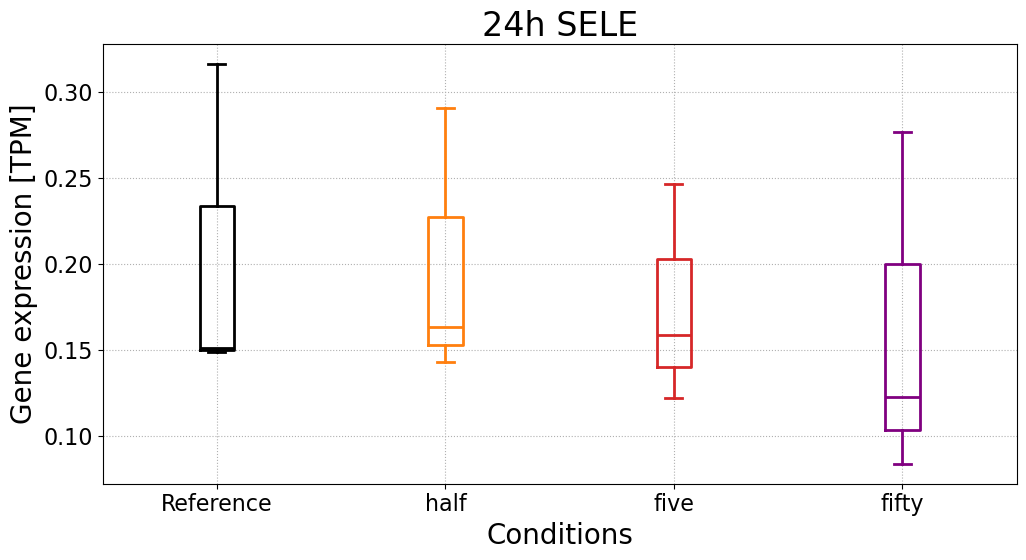


ENSG00000078401 EDN1
[538.45252966 512.74574511 508.67894465]
[608.12747684 566.49194589 533.90546673]
[629.78411982 636.59725926 452.93730925]
[608.81122862 615.31356286 667.74238129]
0.0060598880719944775 0.2626099996981666


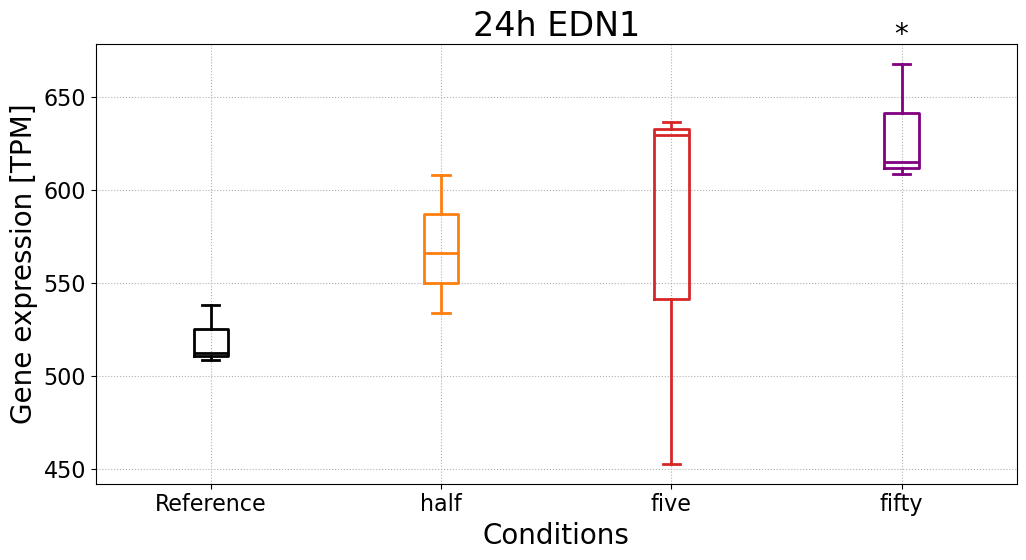


ENSG00000090339 ICAM1
[46.01770734 42.21666542 38.13425454]
[24.98965322 31.81581697 36.37956476]
[26.77413831 22.70733548 31.06585239]
[30.59945442 38.49498729 36.74213314]
0.009999042212681535 -0.6378456060436981


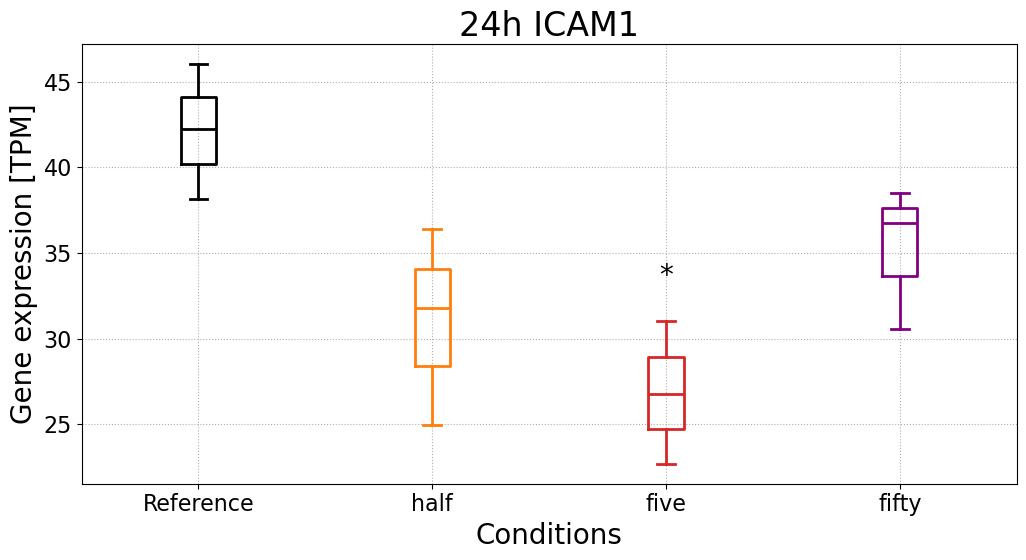


ENSG00000091879 ANGPT2
[20.55661801 18.26606875 20.03102692]
[28.86684114 30.39665718 22.4650076 ]
[30.21130983 53.69823416 28.54468815]
[30.84668255 22.34056793 25.37481648]
0.03922843598100452 0.5060253622699072


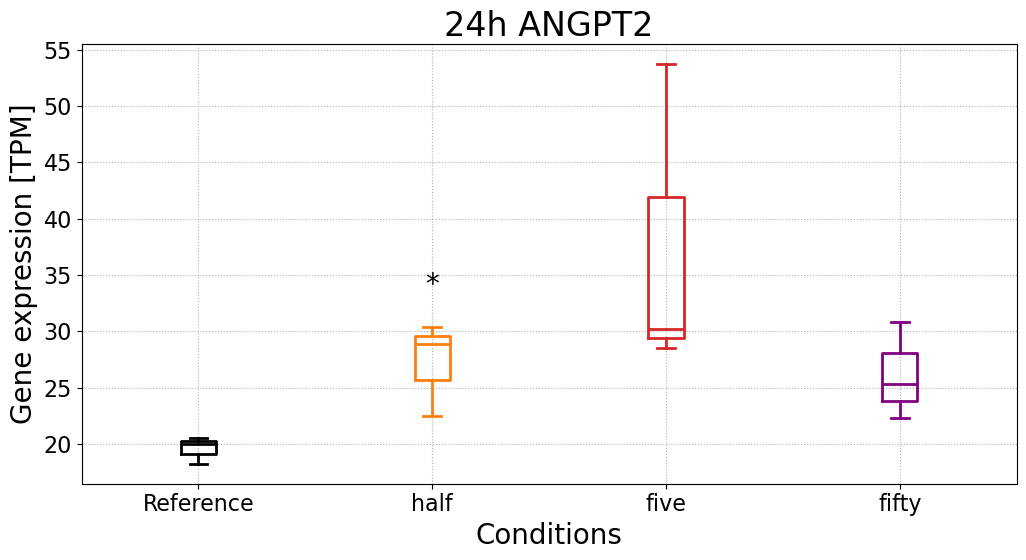


ENSG00000100311 PDGFB
[50.55223169 46.87658411 33.42915046]
[37.2913792  49.31873174 52.51707941]
[40.33217788 41.07976849 50.30034896]
[56.87598283 55.87865825 56.00248949]


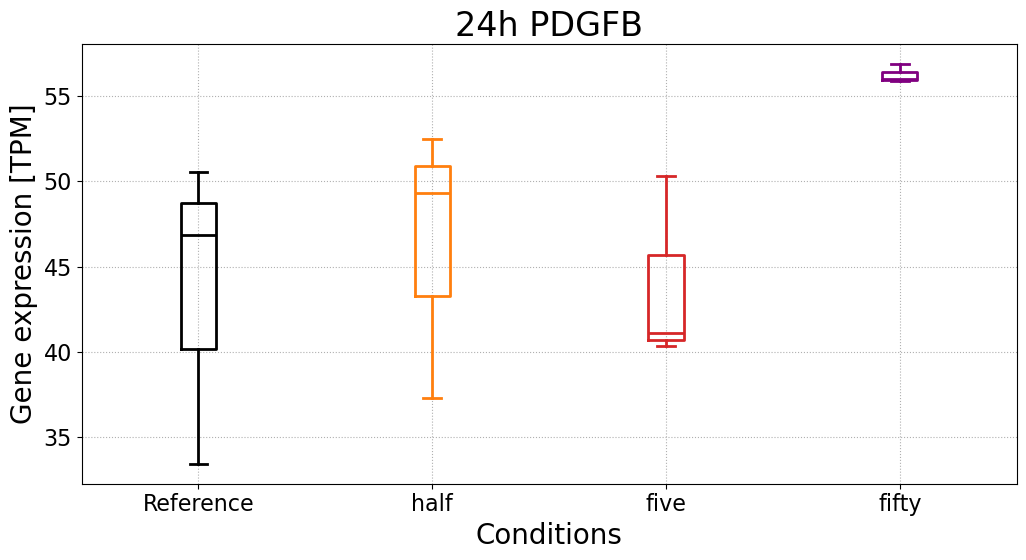


ENSG00000102755 FLT1
[7.50816251 8.53263992 5.57102347]
[7.8374824  6.49220537 5.31466309]
[ 8.32466918 11.89587671  4.72702739]
[9.17676087 5.69653627 6.43948961]


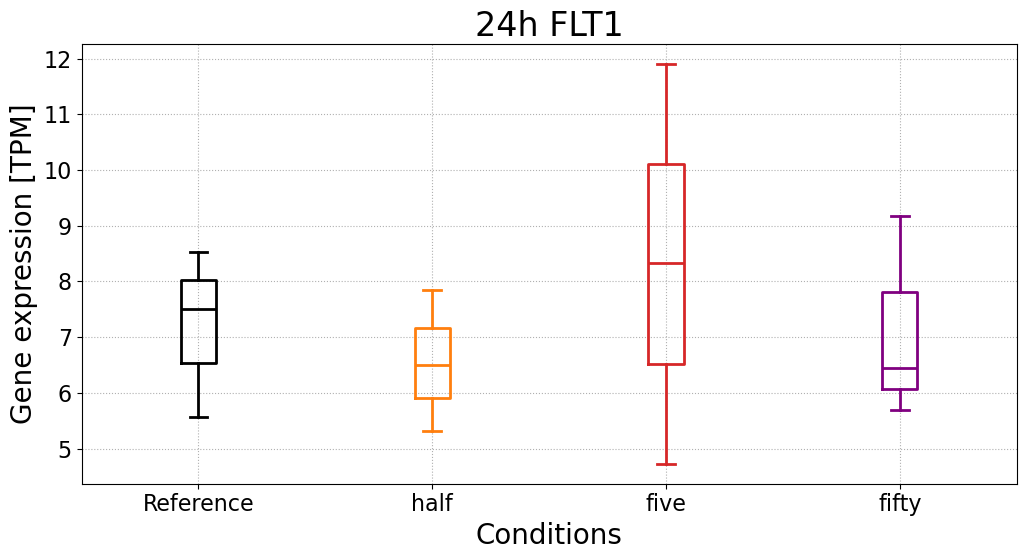


ENSG00000106366 SERPINE1
[6075.11271105 6039.16952204 5072.6977279 ]
[4954.3480848  5651.429002   5959.09073919]
[5358.95741559 4515.22078017 5686.64310653]
[5842.13522958 7258.7039014  6998.35803008]


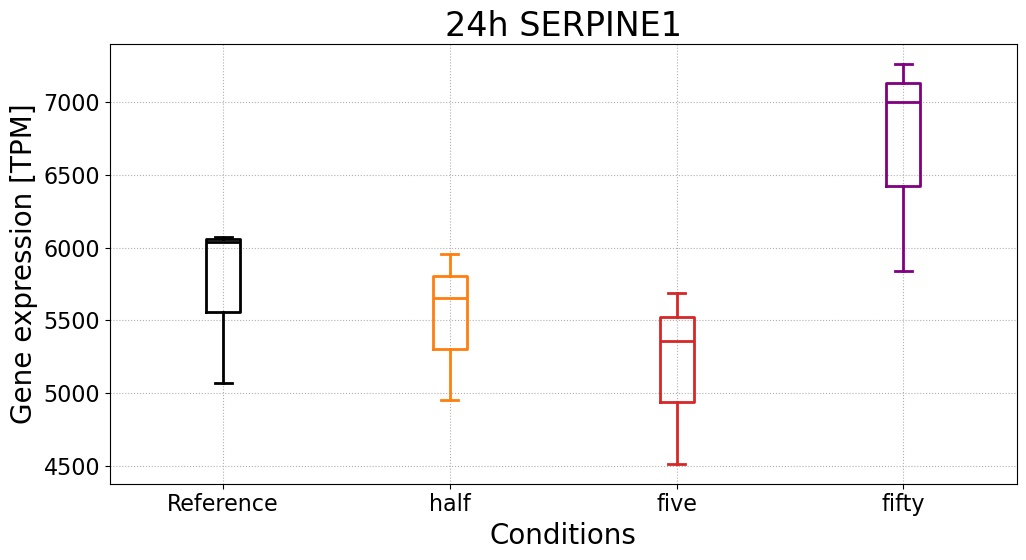


ENSG00000108622 ICAM2
[123.59082331 118.17874746 144.87628355]
[146.25727378 181.69114714 216.9294222 ]
[159.10704274 123.10735117 249.4323818 ]
[159.54580323 258.41856461 226.58683894]
0.046806984951754636 0.8692193197239905


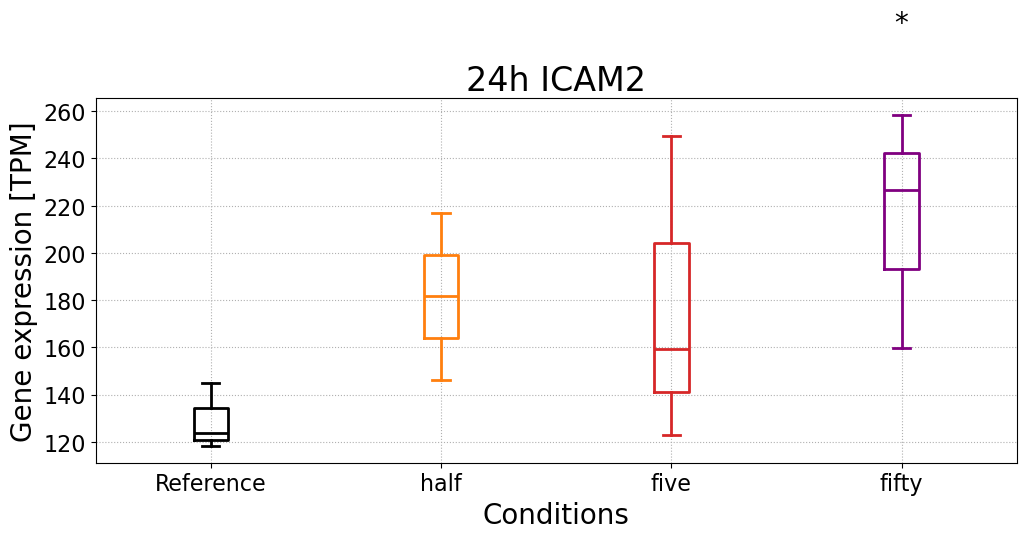


ENSG00000110799 VWF
[74.00325873 85.29399216 91.66659498]
[ 75.37802343  78.95211969 119.37244393]
[82.32644182 58.13042434 86.58729337]
[82.55964874 79.701453   78.39480889]


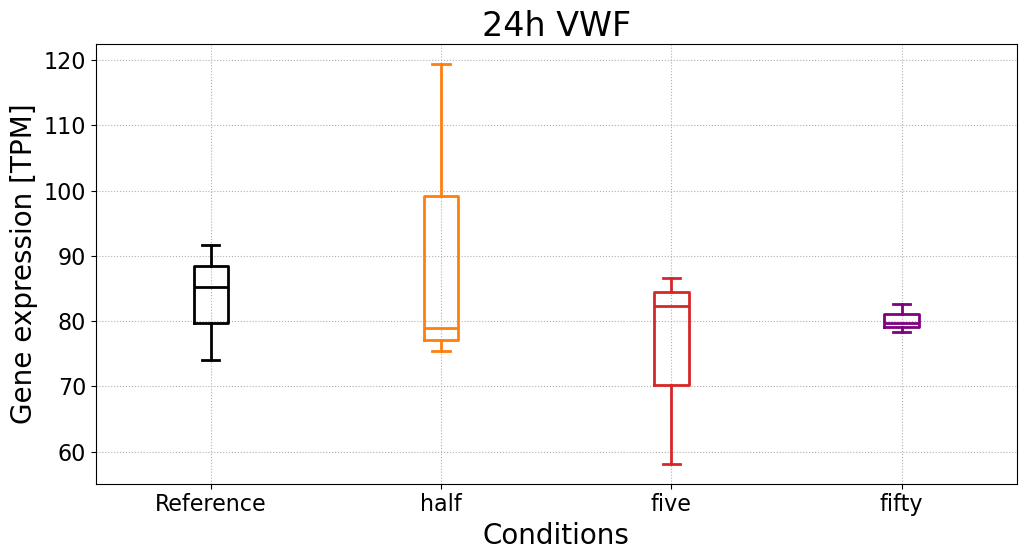


ENSG00000112715 VEGFA
[21.09856026 24.41783188 17.06267906]
[20.46109703 19.91263891 24.28125613]
[23.89715895 27.0611275  21.44659846]
[30.93933505 22.33881705 23.95778782]


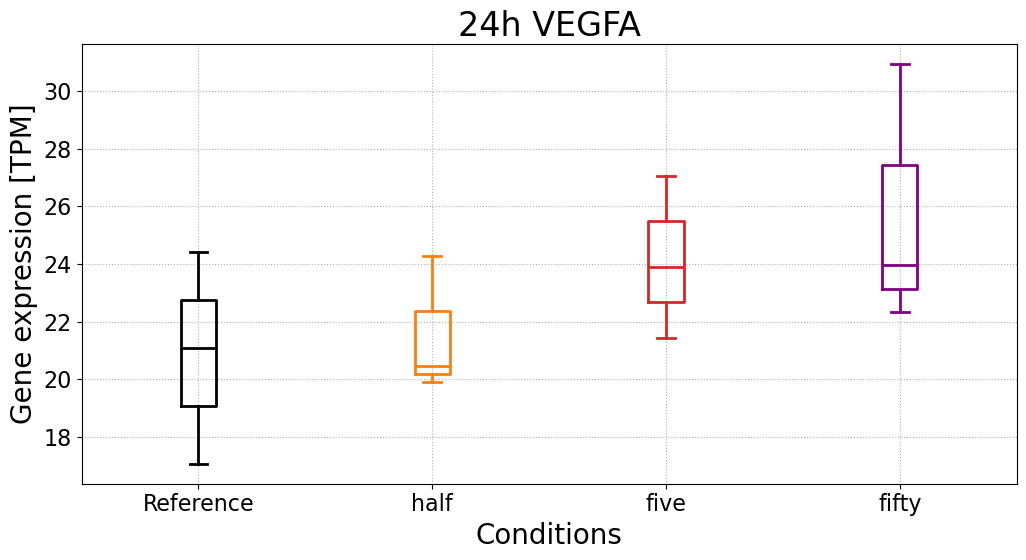


ENSG00000119630 PGF
[67.09286913 59.33306624 76.18567765]
[ 59.43197689  80.46491362 101.83307911]
[ 64.10728389  54.3143424  117.91847829]
[68.13197201 98.24340912 87.26578668]


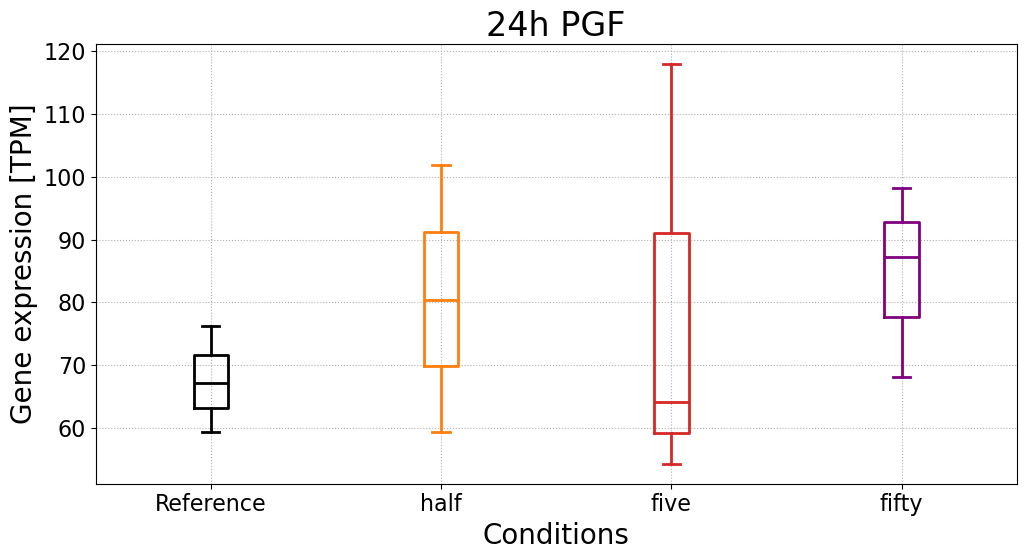


ENSG00000120156 TEK
[56.05648014 59.48824103 41.27594261]
[59.49582045 55.84637626 51.44392346]
[72.29867824 74.96677185 38.11897904]
[69.31825159 54.93628943 59.6157404 ]


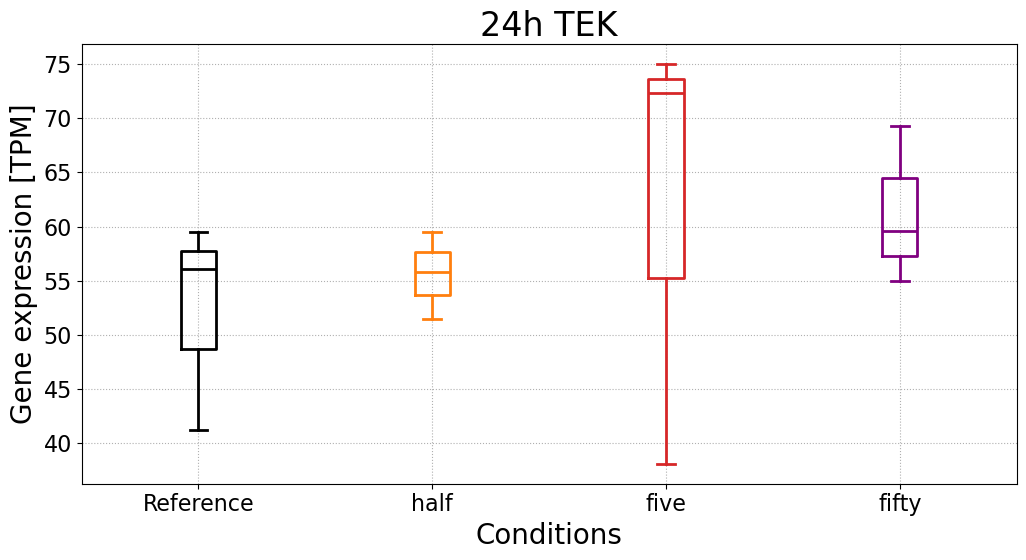


ENSG00000122861 PLAU
[535.57241625 517.94122852 447.72813743]
[384.32216079 460.00129211 507.62416035]
[401.00030798 290.53858645 425.09481591]
[432.99517424 543.60228474 518.73129368]


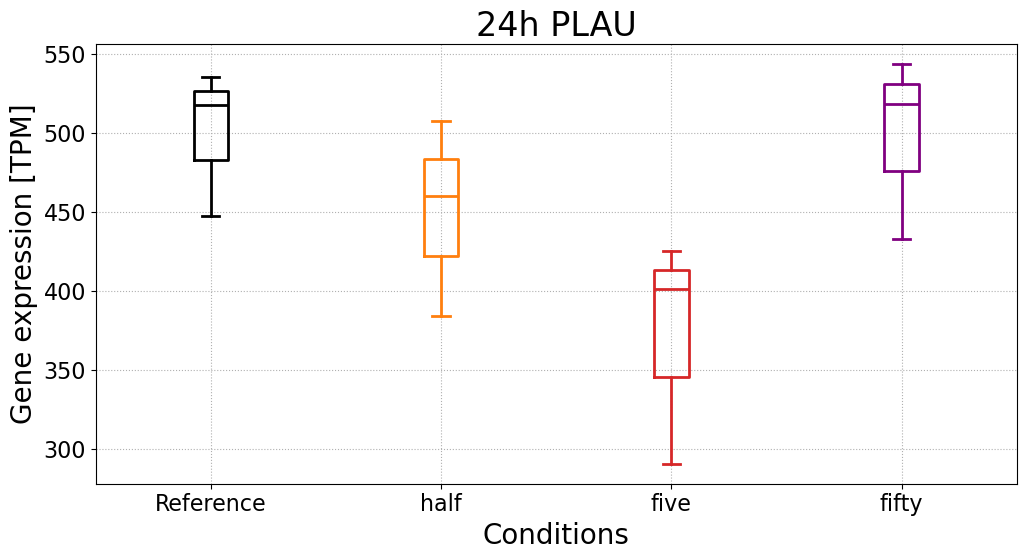


ENSG00000136244 IL6
[16.95101117 16.08951438 15.16374459]
[36.57515689 35.73655302 26.76377023]
[35.47372197 39.4862083  31.1781048 ]
[36.95602407 45.9054232  42.65698784]
0
1
2
0.005970133329260967 1.1041048633209134
0.0014087441670345394 1.0937460256666829
0.0006407548571969421 1.3531011917482407


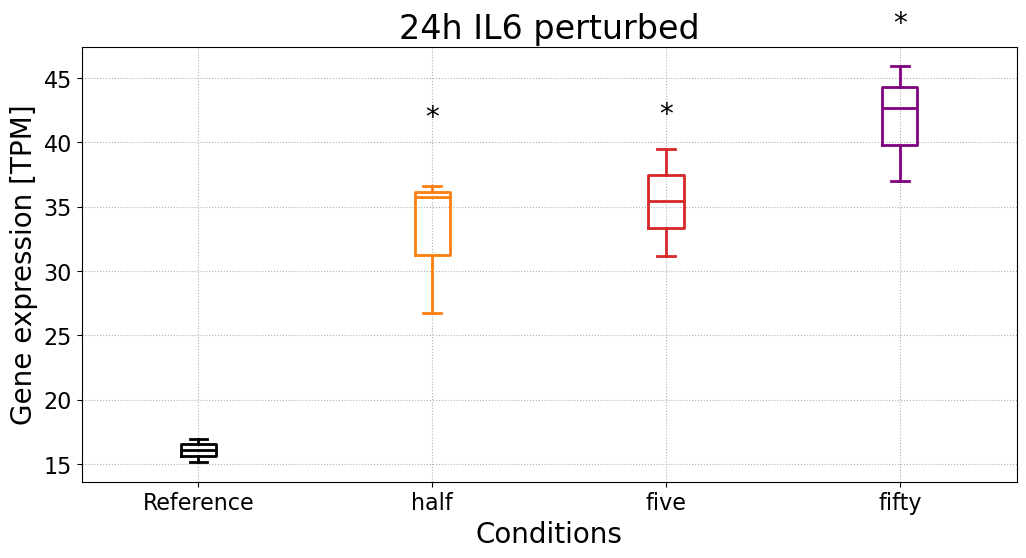


ENSG00000145431 PDGFC
[62.43576047 65.43179924 53.2464311 ]
[48.01859031 40.3964275  34.60044122]
[46.08065713 52.72482554 30.80948311]
[49.60281549 34.53587927 45.01784767]
0.022251301425604098 -0.6157900872084273
0.0399324648476648 -0.46310284819432695


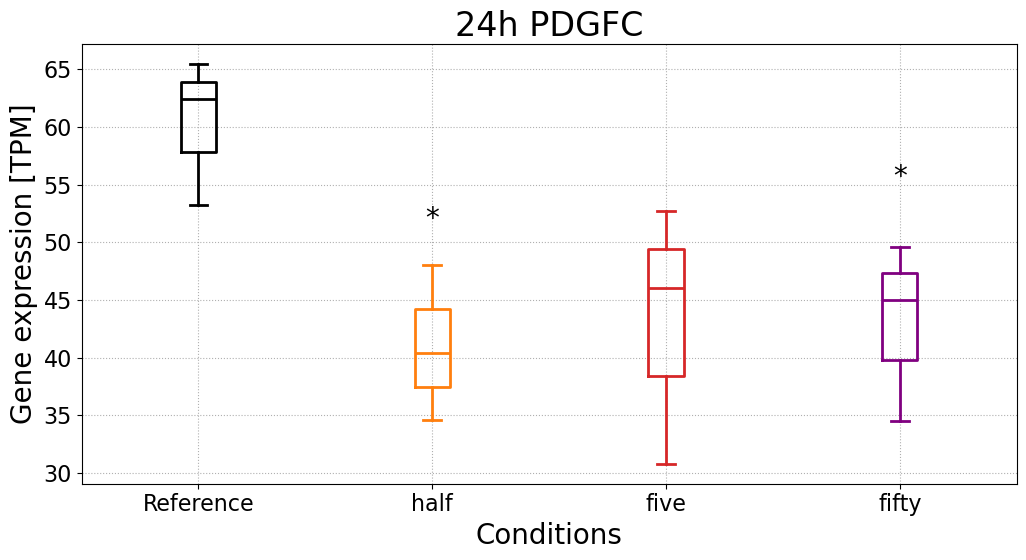


ENSG00000150630 VEGFC
[36.54386127 37.18323623 40.44854157]
[35.76861681 35.30796938 29.37149497]
[32.31591837 37.48395532 33.47225228]
[35.76642875 34.86986502 36.75151138]


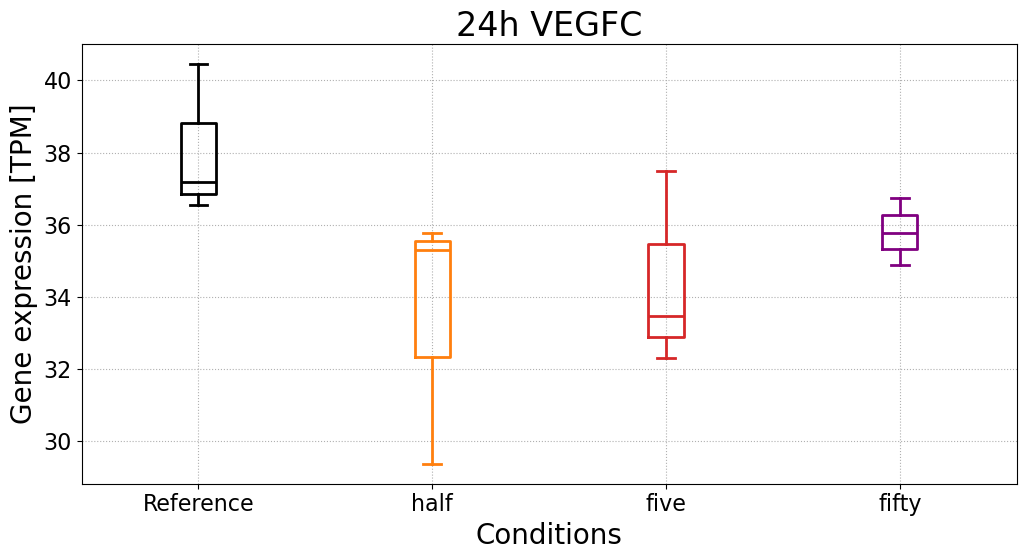


ENSG00000164283 ESM1
[358.78273419 326.84166121 387.28272319]
[906.55771595 842.77988682 670.49048092]
[ 903.81634998 1267.7528489   706.79312782]
[988.2123144  860.20658109 987.60212283]
0
1
2
0.003480393712864544 1.2297407444876214
0.02192077865415998 1.3304990450118528
0.00021642413980736062 1.4582640504144087


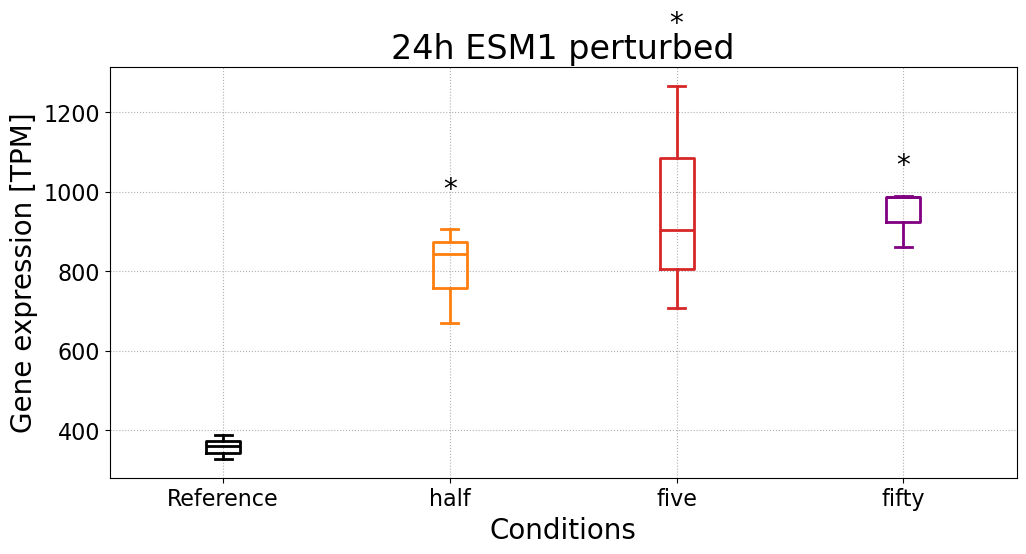


ENSG00000173511 VEGFB
[44.18149456 36.2587743  67.61639383]
[37.71780693 41.29925491 50.18535209]
[35.29047678 29.12553603 61.16400541]
[34.68353315 43.32454631 41.81154995]


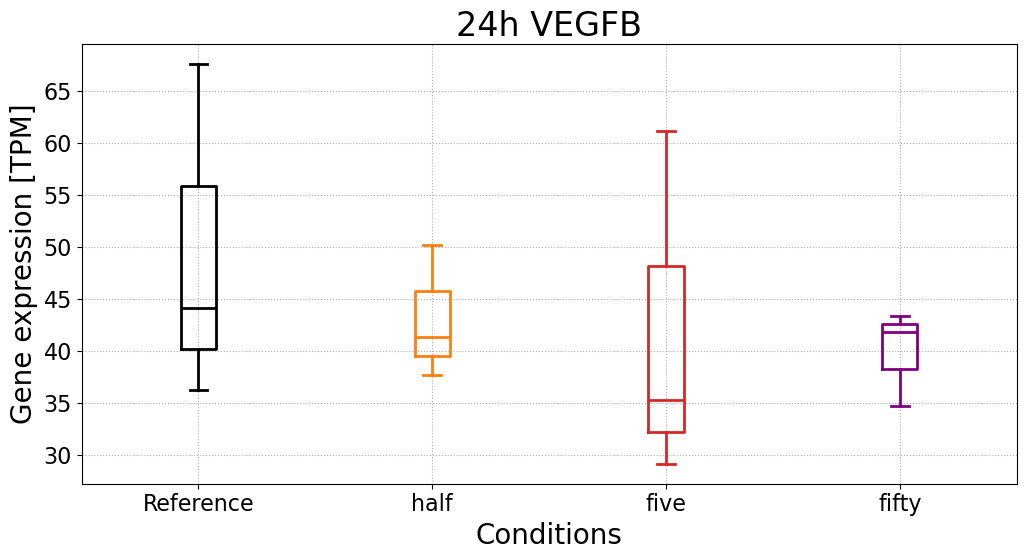


ENSG00000197461 PDGFA
[11.31295614 13.06729819 12.41230777]
[ 9.12955856 11.04714046 12.0664947 ]
[ 9.73641098  9.27967446 11.64055165]
[11.1773476  12.54807612 13.33283274]


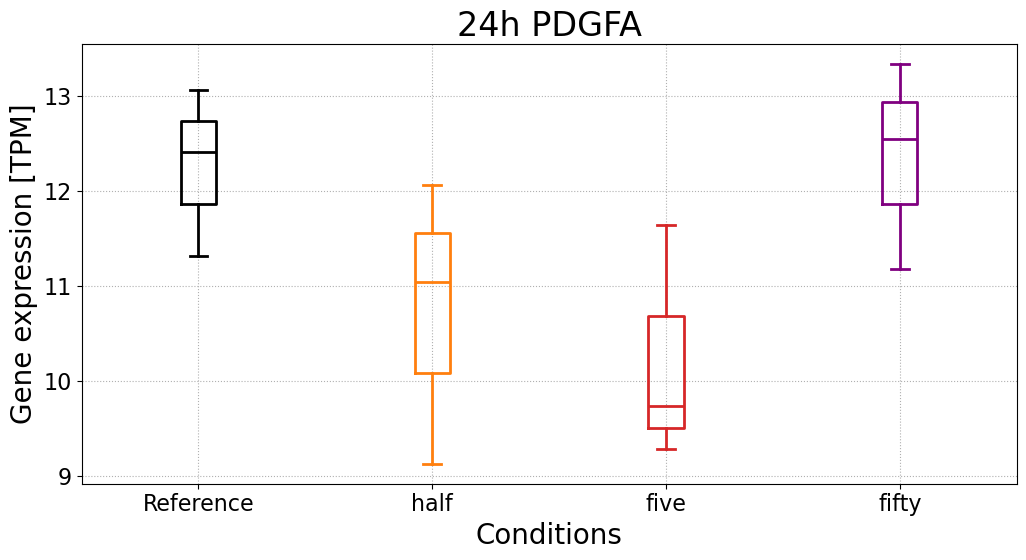

In [16]:
"""
num_subset['t4zero'] = numpy.median(num_subset.iloc[:, 3:6], axis=1)  # t4zero
num_subset['t4half'] = numpy.median(num_subset.iloc[:, 6:8], axis=1) # t4half
num_subset['t4five'] = numpy.median(num_subset.iloc[:, 8:11], axis=1) # t4five
num_subset['t4fifty'] = numpy.median(num_subset.iloc[:, 11:13], axis=1) # t4five

num_subset['t24zero'] = numpy.median(num_subset.iloc[:, 13:16], axis=1) # t24zero
num_subset['t24five'] = numpy.median(num_subset.iloc[:, 16:19], axis=1) # t24half
num_subset['t24half'] = numpy.median(num_subset.iloc[:, 19:22], axis=1) # t24five
num_subset['t24fifty'] = numpy.median(num_subset.iloc[:, 22:25], axis=1) # t24five
"""


# perform tests and plot boxplots
for ensembl in adf.index:

    geneid = subset.loc[ensembl, 'Gene name']
    print(ensembl, geneid)
    
    reference_tpms = num_subset.loc[ensembl, ][13:16].values
    half_tpms = num_subset.loc[ensembl, ][16:19].values
    five_tpms = num_subset.loc[ensembl, ][19:22].values
    fifty_tpms = num_subset.loc[ensembl, ][22:25].values

    print(reference_tpms)
    print(half_tpms)
    print(five_tpms)
    print(fifty_tpms)

    [statistic, pa] = scipy.stats.ttest_ind(half_tpms, reference_tpms)
    [statistic, pb] = scipy.stats.ttest_ind(five_tpms, reference_tpms)
    [statistic, pc] = scipy.stats.ttest_ind(fifty_tpms, reference_tpms)
    
    fa = numpy.log2((numpy.median(half_tpms) + 1) / (numpy.median(reference_tpms) + 1))
    fb = numpy.log2((numpy.median(five_tpms) + 1) / (numpy.median(reference_tpms) + 1))
    fc = numpy.log2((numpy.median(fifty_tpms) + 1) / (numpy.median(reference_tpms) + 1))

    pvalues = [pa, pb, pc]; folds = [fa, fb, fc]; tpms = [half_tpms, five_tpms, fifty_tpms]
    hit = False
    for i in range(3):
        if pvalues[i] < 0.05:
            if numpy.abs(folds[i]) > 1:
                print(i)
                hit = True
    
    if hit == True:
        the_title = '24h {} perturbed'.format(geneid)
    else:
        the_title = '24h {}'.format(geneid)
        
    matplotlib.pyplot.boxplot([reference_tpms], positions=[1], whiskerprops=dict(color='black', lw=2), medianprops=dict(color='black', lw=2), capprops=dict(color='black', lw=2), boxprops=dict(color='black', lw=2))
    matplotlib.pyplot.boxplot([half_tpms], positions=[2], whiskerprops=dict(color='tab:orange', lw=2), medianprops=dict(color='tab:orange', lw=2), capprops=dict(color='tab:orange', lw=2), boxprops=dict(color='tab:orange', lw=2))
    matplotlib.pyplot.boxplot([five_tpms], positions=[3], whiskerprops=dict(color='tab:red', lw=2), medianprops=dict(color='tab:red', lw=2), capprops=dict(color='tab:red', lw=2), boxprops=dict(color='tab:red', lw=2))
    matplotlib.pyplot.boxplot([fifty_tpms], positions=[4], whiskerprops=dict(color='purple', lw=2), medianprops=dict(color='purple', lw=2), capprops=dict(color='purple', lw=2), boxprops=dict(color='purple', lw=2))

    for i in range(3):
        if pvalues[i] < 0.05:
            print(pvalues[i], folds[i])
            matplotlib.pyplot.text(i+2, numpy.mean(tpms[i])+(numpy.std(tpms[i])*2), '*', ha="center", va="center")
    
    matplotlib.pyplot.xticks([1, 2, 3, 4], ['Reference', 'half', 'five', 'fifty'])
    matplotlib.pyplot.xlabel('Conditions')
    matplotlib.pyplot.ylabel('Gene expression [TPM]')
    matplotlib.pyplot.title(the_title)
    matplotlib.pyplot.grid(ls=':')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()
    
    print()

In [17]:
# transform log2 p one and then zscroe
log2po = numpy.log2(adf + 1)
zdf = scipy.stats.zscore(log2po, axis=1) 
zdf

,t4zero,t4half,t4five,t4fifty,t24zero,t24five,t24half,t24fifty
ENSEMBL ID,,,,,,,,
ENSG00000007908,2.331063,0.529640,0.151225,-0.004237,-0.749492,-0.736202,-0.741392,-0.780605
ENSG00000078401,-1.723428,0.085739,-0.156800,1.902696,-0.913242,-0.188662,0.581353,0.412345
ENSG00000090339,1.566153,0.972179,0.605941,0.472753,-0.345267,-1.067045,-1.504348,-0.700366
ENSG00000091879,0.237397,0.035940,0.176856,-1.206823,-1.802198,1.072326,1.433181,0.053321
ENSG00000100311,2.518892,0.048791,-0.082732,-0.580047,-0.545605,-0.400516,-0.921981,-0.036803
ENSG00000102755,1.045118,0.652214,1.067464,1.178709,-0.928044,-1.101337,-0.803165,-1.110959
ENSG00000106366,0.948196,0.276196,-0.936089,-1.611316,0.415511,-0.169707,-0.638340,1.715549
ENSG00000108622,-0.887626,-0.539481,-0.959366,-1.338305,0.321597,1.076672,0.816366,1.510144
ENSG00000110799,1.304777,-1.062232,1.800983,-0.210175,0.300884,-0.999024,-0.295052,-0.840161


In [18]:
adf

,t4zero,t4half,t4five,t4fifty,t24zero,t24five,t24half,t24fifty
ENSEMBL ID,,,,,,,,
ENSG00000007908,12.582456,2.207822,1.368911,1.091506,0.151232,0.163555,0.158727,0.122891
ENSG00000078401,458.654477,588.283183,568.980277,755.277521,512.745745,566.491946,629.784120,615.313563
ENSG00000090339,88.596822,70.432572,61.119247,58.042193,42.216665,31.815817,26.774138,36.742133
ENSG00000091879,25.973924,25.318939,25.775394,21.615749,20.031027,28.866841,30.211310,25.374816
ENSG00000100311,135.926338,57.700308,55.111782,46.314485,46.876584,49.318732,41.079768,56.002489
ENSG00000102755,35.195819,26.129686,35.794246,38.923855,7.508163,6.492205,8.324669,6.439490
ENSG00000106366,6415.180489,5944.518560,5181.045978,4799.158712,6039.169522,5651.429002,5358.957416,6998.358030
ENSG00000108622,66.495223,79.522596,64.084754,52.709975,123.590823,181.691147,159.107043,226.586839
ENSG00000110799,90.533925,78.655917,93.240251,82.742784,85.293992,78.952120,82.326442,79.701453


In [19]:
print(zdf.min(), zdf.max())

t4zero     -1.723428
t4half     -1.136339
t4five     -1.800335
t4fifty    -1.723582
t24zero    -2.269126
t24five    -1.478487
t24half    -1.504348
t24fifty   -1.110959
dtype: float64 t4zero      2.518892
t4half      0.972179
t4five      1.800983
t4fifty     1.902696
t24zero     1.895186
t24five     1.076672
t24half     1.433181
t24fifty    1.715549
dtype: float64


In [20]:
ynames = [biomarkers[element][0] for element in adf.index]

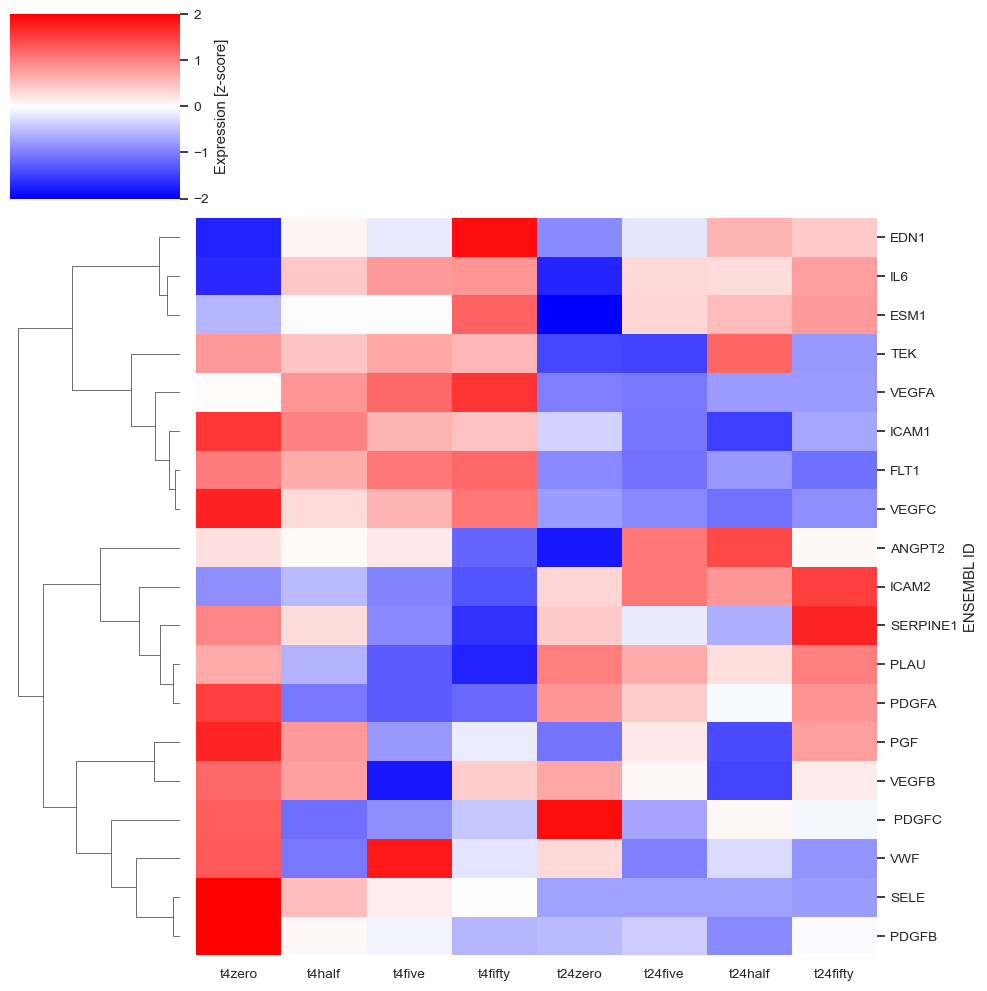

In [21]:
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.set(font_scale=0.9)
seaborn.clustermap(zdf, 
                   cmap='bwr',        
                   col_cluster=False, 
                   vmin=-2, vmax=2,   
                   method=linkage_method, 
                   metric=distance_metric, 
                   yticklabels=ynames, 
                   xticklabels=adf.columns, 
                   cbar_kws={'label':'Expression [z-score]'})
matplotlib.pyplot.tight_layout()